This project aims to explore what type of drawdowns and returns you might typically see the day of or shortly after a federal reserve operation, as in a rate hike or cut. The data collected was directly from the federal reserve and the price data is the nasdaq composite (IXIC). This analysis extends from current day back until 1990, which is when the archived rate hike information ends on the government website. 

The idea is quite simple but hopefully informative. How much of a drawdown or return has the Nasdaq witnessed the day of or shortly after (next day) a fed opperation has occurred. 


Everything was calulated as a percentage move.

Max_return (day of event) = ((High - Open)/Open) * 100
Max_return_24hours was calculated as = ((High24hours - Open)/Open) * 100
Drawdown (day of event) = ((Low - Open)/Open) * 100
Drawdown_24hours = ((Low24hours - Open)/Open) * 100

The drawdowns assume that an individual would have a position at the level when markets open at that level of the day the fed operation occurred and, if they held throughout that day, what percentage drawdown would they experience.

In [71]:
import pandas as pd,matplotlib.pyplot as plt, statsmodels.formula.api as smf, seaborn as sns
from datetime import timedelta


In [72]:
df1 = pd.read_csv('Fed_Hikes.csv')
#df1 = df1.rename(columns={'Fed-opp':'Date'}

print(df1)

# load the second dataset
df2 = pd.read_csv('IXIC.csv')
df2 = df2.assign(status="IXIC")

print(df2)

          Date  points Level (%)  Type
0    11/6/2002      50      1.25   Cut
1   12/11/2001      25      1.75   Cut
2    11/6/2001      50         2   Cut
3    10/2/2001      50       2.5   Cut
4    9/17/2001      50         3   Cut
..         ...     ...       ...   ...
93    5/5/2022      50         1  Rise
94   6/16/2022      75      1.75  Rise
95   7/27/2022      75       2.5  Rise
96   9/21/2022      75      3.25  Rise
97   11/2/2022      75         4  Rise

[98 rows x 4 columns]
             Date          Open          High           Low         Close  \
0      1971-02-05    100.000000    100.000000    100.000000    100.000000   
1      1971-02-08    100.839996    100.839996    100.839996    100.839996   
2      1971-02-09    100.760002    100.760002    100.760002    100.760002   
3      1971-02-10    100.690002    100.690002    100.690002    100.690002   
4      1971-02-11    101.449997    101.449997    101.449997    101.449997   
...           ...           ...           ...  

In [73]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%m/%d/%Y')
df1 = df1.rename(columns={'Type': 'Opp_Type'})
print(df1)

df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
print(df2)

         Date  points Level (%) Opp_Type
0  2002-11-06      50      1.25      Cut
1  2001-12-11      25      1.75      Cut
2  2001-11-06      50         2      Cut
3  2001-10-02      50       2.5      Cut
4  2001-09-17      50         3      Cut
..        ...     ...       ...      ...
93 2022-05-05      50         1     Rise
94 2022-06-16      75      1.75     Rise
95 2022-07-27      75       2.5     Rise
96 2022-09-21      75      3.25     Rise
97 2022-11-02      75         4     Rise

[98 rows x 4 columns]
            Date          Open          High           Low         Close  \
0     1971-02-05    100.000000    100.000000    100.000000    100.000000   
1     1971-02-08    100.839996    100.839996    100.839996    100.839996   
2     1971-02-09    100.760002    100.760002    100.760002    100.760002   
3     1971-02-10    100.690002    100.690002    100.690002    100.690002   
4     1971-02-11    101.449997    101.449997    101.449997    101.449997   
...          ...           ..

In [74]:
merged_df = pd.merge(df1, df2, on='Date')

merged_df = merged_df.assign(hours24 = merged_df["Date"] + timedelta(days=1),
                             week1 = merged_df["Date"] + timedelta(days=7),
                             week4 = merged_df["Date"] + timedelta(days=28),
                             week28 = merged_df["Date"] + timedelta(days=196),
                             week52 = merged_df["Date"] + timedelta(days=364))
#print(merged_df)

Below... Before and after ChatGPT

hours24_df = merged_df.loc[:,"hours24"].to_frame()
hours24_df = hours24_df.merge(df2, left_on='hours24', right_on='Date')
#print(hours24_df.dtypes)

hours24_df = hours24_df.rename({'Low':'Low24hrs'},axis=1)
hours24_df = hours24_df.rename({'High':'High24hrs'},axis=1)


hours24_df = hours24_df.loc[:,['hours24','Low24hrs', 'High24hrs']]
#print(hours24_df.dtypes)



In [75]:
hours24_df = merged_df[["hours24"]].merge(df2, left_on="hours24", right_on="Date").assign(Low24hrs=lambda x: x["Low"], High24hrs=lambda x: x["High"])[["hours24", "Low24hrs", "High24hrs"]]

print(hours24_df)

      hours24      Low24hrs     High24hrs
0  2002-11-07   1371.469971   1400.079956
1  2001-12-12   1975.650024   2022.760010
2  2001-11-07   1820.280029   1868.310059
3  2001-10-03   1473.219971   1595.479980
4  2001-09-18   1548.849976   1605.060059
..        ...           ...           ...
83 2022-05-06  11990.150391  12358.419922
84 2022-06-17  10638.719727  10884.709961
85 2022-07-28  11886.669922  12179.089844
86 2022-09-22  11024.639648  11203.769531
87 2022-11-03  10319.540039  10486.009766

[88 rows x 3 columns]


In [76]:
week1_df = merged_df[["week1"]].merge(df2, left_on="week1", right_on="Date").assign(Low1week=lambda x: x["Low"], High1week=lambda x: x["High"])[["week1", "Low1week", "High1week"]]

print(week1_df)

        week1      Low1week     High1week
0  2002-11-13   1334.130005   1371.739990
1  2001-12-18   1989.810059   2010.910034
2  2001-11-13   1867.270020   1893.920044
3  2001-10-09   1565.969971   1607.199951
4  2001-09-24   1459.469971   1507.510010
..        ...           ...           ...
91 2022-05-12  11108.759766  11547.330078
92 2022-06-23  11046.280273  11260.269531
93 2022-08-03  12425.209961  12699.639648
94 2022-09-28  10776.339844  11101.500000
95 2022-11-09  10344.009766  10564.969727

[96 rows x 3 columns]


In [77]:
week4_df = merged_df[["week4"]].merge(df2, left_on="week4", right_on="Date").assign(Lowweek4=lambda x: x["Low"], Highweek4=lambda x: x["High"])[["week4", "Lowweek4", "Highweek4"]]

print(week4_df)

        week4      Lowweek4     Highweek4
0  2002-12-04   1412.920044   1444.180054
1  2002-01-08   2027.339966   2060.229980
2  2001-12-04   1913.920044   1963.219971
3  2001-10-30   1646.300049   1686.680054
4  2001-10-15   1663.780029   1698.239990
..        ...           ...           ...
91 2022-06-02  11901.450195  12320.120117
92 2022-07-14  11005.929688  11279.969727
93 2022-08-24  12350.160156  12504.330078
94 2022-10-19  10592.879883  10808.040039
95 2022-11-30  10966.530273  11468.469727

[96 rows x 3 columns]


In [78]:
week28_df = merged_df[["week28"]].merge(df2, left_on="week28", right_on="Date").assign(Lowweek28=lambda x: x["Low"], Highweek28=lambda x: x["High"])[["week28", "Lowweek28", "Highweek28"]]
print(week28_df)

       week28     Lowweek28    Highweek28
0  2003-05-21   1478.150024   1490.819946
1  2002-06-25   1419.250000   1475.579956
2  2002-05-21   1660.219971   1717.930054
3  2002-04-16   1779.290039   1816.910034
4  2002-04-01   1817.250000   1865.369995
..        ...           ...           ...
87 2020-02-13   9650.019531   9748.320313
88 2020-09-28  11019.139648  11120.790039
89 2020-09-15  11127.980469  11244.459961
90 2022-09-29  10623.219727  10899.469727
91 2022-11-17  11006.209961  11198.839844

[92 rows x 3 columns]


In [79]:
week52_df = merged_df[["week52"]].merge(df2, left_on="week52", right_on="Date").assign(Lowweek52=lambda x: x["Low"], Highweek52=lambda x: x["High"])[["week52", "Lowweek52", "Highweek52"]]
print(week52_df)

       week52     Lowweek52    Highweek52
0  2003-11-05   1938.219971   1966.150024
1  2002-12-10   1373.890015   1397.839966
2  2002-11-05   1379.329956   1401.369995
3  2002-10-01   1160.709961   1214.010010
4  2002-09-16   1267.689941   1292.729980
..        ...           ...           ...
86 2020-10-29  11030.190430  11287.629883
87 2020-09-17  10783.809570  10974.450195
88 2020-07-30  10412.089844  10609.589844
89 2021-03-15  13272.500000  13460.349609
90 2021-03-02  13352.000000  13601.330078

[91 rows x 3 columns]


In [80]:
fed = merged_df.merge(hours24_df, on='hours24').merge(week1_df, on='week1').merge(week4_df, on='week4').merge(week28_df, on='week28').merge(week52_df, on='week52')
print(fed)

         Date  points  Level (%) Opp_Type         Open         High  \
0  2002-11-06      50       1.25      Cut  1408.219971  1419.040039   
1  2001-12-11      25       1.75      Cut  2009.930054  2032.630005   
2  2001-11-06      50          2      Cut  1786.920044  1835.489990   
3  2001-10-02      50        2.5      Cut  1479.010010  1504.239990   
4  2001-09-17      50          3      Cut  1613.829956  1629.099976   
..        ...     ...        ...      ...          ...          ...   
71 2018-03-22      25  1.50-1.75      Cut  7257.549805  7303.189941   
72 2019-09-19      25  1.75-2.00      Cut  8193.589844  8237.429688   
73 2019-08-01      25  2.00-2.25      Cut  8190.560059  8311.040039   
74 2020-03-16     100     0-0.25      Cut  7392.729980  7422.200195   
75 2020-03-03      50  1.00-1.25      Cut  8965.099609  9070.320313   

            Low        Close    Adj Close      Volume  ...     Low24hrs  \
0   1386.520020  1418.989990  1418.989990  2189420000  ...  1371.469971 

In [81]:
fed = fed.assign(Max_return=((fed['High'] - fed['Open'])/fed['Open'])*100,
                 Drawdown=((fed['Low'] - fed['Open'])/fed['Open'])*100,
                 Max_return_24hrs=((fed['High24hrs']-fed['Open'])/fed['Open'])*100,
                 Drawdown_24hrs=((fed['Low24hrs']-fed['Open'])/fed['Open'])*100,
                 Max_return_1week=((fed['High1week']-fed['Open'])/fed['Open'])*100,
                 Max_return_4weeks=((fed['Highweek4']-fed['Open'])/fed['Open'])*100,
                 Max_return_28weeks=((fed['Highweek28']-fed['Open'])/fed['Open'])*100,
                 Max_return_52weeks=((fed['Highweek52']-fed['Open'])/fed['Open'])*100)


print(fed)



         Date  points  Level (%) Opp_Type         Open         High  \
0  2002-11-06      50       1.25      Cut  1408.219971  1419.040039   
1  2001-12-11      25       1.75      Cut  2009.930054  2032.630005   
2  2001-11-06      50          2      Cut  1786.920044  1835.489990   
3  2001-10-02      50        2.5      Cut  1479.010010  1504.239990   
4  2001-09-17      50          3      Cut  1613.829956  1629.099976   
..        ...     ...        ...      ...          ...          ...   
71 2018-03-22      25  1.50-1.75      Cut  7257.549805  7303.189941   
72 2019-09-19      25  1.75-2.00      Cut  8193.589844  8237.429688   
73 2019-08-01      25  2.00-2.25      Cut  8190.560059  8311.040039   
74 2020-03-16     100     0-0.25      Cut  7392.729980  7422.200195   
75 2020-03-03      50  1.00-1.25      Cut  8965.099609  9070.320313   

            Low        Close    Adj Close      Volume  ...     Lowweek52  \
0   1386.520020  1418.989990  1418.989990  2189420000  ...   1938.21997

In [82]:
fed['Date'].min()

Timestamp('1990-10-29 00:00:00')

In [83]:
model_fed = smf.ols("Max_return ~ points", data=fed)
results_fed = model_fed.fit()
print(results_fed.summary())



                            OLS Regression Results                            
Dep. Variable:             Max_return   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     7.995
Date:                Tue, 06 Dec 2022   Prob (F-statistic):            0.00603
Time:                        10:55:06   Log-Likelihood:                -160.91
No. Observations:                  76   AIC:                             325.8
Df Residuals:                      74   BIC:                             330.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0989      0.527      0.188      0.8

In [84]:

model_fed_dd = smf.ols("Drawdown ~ points", data=fed)
results_fed_dd = model_fed_dd.fit()
#print(results_fed_dd.summary())


In [85]:
fed_grouped = fed.groupby('Opp_Type')
fed_summary = fed_grouped[['Max_return_24hrs','Drawdown_24hrs']].describe()
print(fed_summary)

         Max_return_24hrs                                                    \
                    count      mean       std       min       25%       50%   
Opp_Type                                                                      
Cut                  46.0  1.804151  3.444819 -3.473745 -0.083376  0.743418   
Rise                 30.0  1.168927  1.660580 -1.076430  0.245391  0.817603   

                              Drawdown_24hrs                               \
               75%        max          count      mean       std      min   
Opp_Type                                                                    
Cut       3.037959  17.308920           46.0 -0.738905  3.203577 -7.62668   
Rise      1.939809   6.774127           30.0 -0.236066  1.334200 -3.01182   

                                                   
               25%       50%       75%        max  
Opp_Type                                           
Cut      -2.535722 -0.617059  0.125469  13.096569  
Rise     -

count      mean       std       min       25%       50%  \
points Opp_Type                                                            
25     Cut        28.0  0.867177  0.897323  0.022567  0.390389  0.628224   
       Rise       25.0  0.936682  0.803670  0.021889  0.376060  0.590849   
50     Cut        14.0  3.324657  4.077273  0.493271  1.003066  1.976361   
       Rise        4.0  0.773131  0.496521  0.343604  0.480804  0.636612   
75     Cut         2.0  3.380670  1.420371  2.376316  2.878493  3.380670   
       Rise        1.0  0.396765       NaN  0.396765  0.396765  0.396765   
100    Cut         2.0  2.290651  2.675710  0.398638  1.344644  2.290651   

                      75%        max  
points Opp_Type                       
25     Cut       1.145065   4.516150  
       Rise      1.481227   2.673923  
50     Cut       3.486582  16.121547  
       Rise      0.928939   1.475697  
75     Cut       3.882847   4.385024  
       Rise      0.396765   0.396765  
100    Cut       3.236657   4.182663

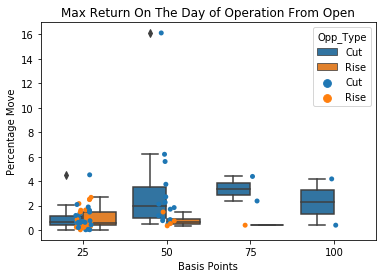

In [86]:
sns.stripplot(x='points', y='Max_return', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Max_return', hue='Opp_Type', data=fed)
axMR = plt.gca()
axMR.set_xlabel('Basis Points')
axMR.set_ylabel('Percentage Move')
axMR.set_title('Max Return On The Day of Operation From Open')

plt.savefig('MR_plot.png', dpi=300)





fed.groupby(['points','Opp_Type'])['Max_return'].describe()


count      mean       std       min       25%       50%  \
points Opp_Type                                                            
25     Cut        28.0 -0.788441  0.761589 -2.769396 -1.298699 -0.469997   
       Rise       25.0 -0.510405  0.592877 -2.658017 -0.709525 -0.353502   
50     Cut        14.0 -1.416438  1.636119 -5.448849 -1.990886 -0.480283   
       Rise        4.0 -0.592468  0.544228 -1.303438 -0.809684 -0.533217   
75     Cut         2.0 -0.198592  0.280851 -0.397184 -0.297888 -0.198592   
       Rise        1.0 -0.243258       NaN -0.243258 -0.243258 -0.243258   
100    Cut         2.0 -3.450424  4.874071 -6.896912 -5.173668 -3.450424   

                      75%       max  
points Opp_Type                      
25     Cut      -0.234579  0.000000  
       Rise     -0.117951  0.000000  
50     Cut      -0.383431 -0.105705  
       Rise     -0.316001  0.000000  
75     Cut      -0.099296  0.000000  
       Rise     -0.243258 -0.243258  
100    Cut      -1.727180 -0.003936

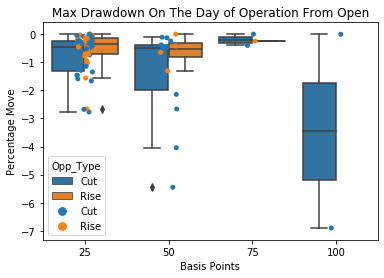

In [87]:
sns.stripplot(x='points', y='Drawdown', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Drawdown', hue='Opp_Type', data=fed)
axDD = plt.gca()
axDD.set_xlabel('Basis Points')
axDD.set_ylabel('Percentage Move')
axDD.set_title('Max Drawdown On The Day of Operation From Open')

plt.savefig('DD_plot.png', dpi=300)



fed.groupby(['points','Opp_Type'])['Drawdown'].describe()

count      mean       std       min       25%       50%  \
points Opp_Type                                                            
25     Cut        28.0  0.689296  1.623226 -1.782517 -0.199875  0.554896   
       Rise       25.0  1.206232  1.800968 -1.076430 -0.151585  0.712757   
50     Cut        14.0  3.669402  5.260915 -3.473745 -0.254583  3.754854   
       Rise        4.0  1.157432  0.659078  0.433487  0.800208  1.097991   
75     Cut         2.0  3.700352  1.065671  2.946809  3.323581  3.700352   
       Rise        1.0  0.282289       NaN  0.282289  0.282289  0.282289   
100    Cut         2.0  2.459165  3.219532  0.182612  1.320888  2.459165   

                      75%        max  
points Opp_Type                       
25     Cut       1.475495   6.028015  
       Rise      1.999189   6.774127  
50     Cut       4.533138  17.308920  
       Rise      1.455215   2.000260  
75     Cut       4.077124   4.453896  
       Rise      0.282289   0.282289  
100    Cut       3.597441   4.735718

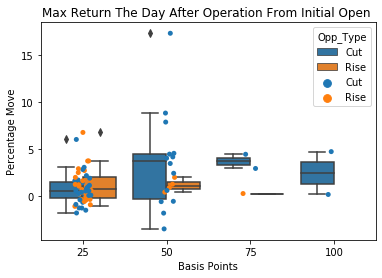

In [88]:
sns.stripplot(x='points', y='Max_return_24hrs', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Max_return_24hrs', hue='Opp_Type', data=fed)

axMR24 = plt.gca()
axMR24.set_xlabel('Basis Points')
axMR24.set_ylabel('Percentage Move')
axMR24.set_title('Max Return The Day After Operation From Initial Open ')






plt.savefig('MR24_plot.png', dpi=300)

fed.groupby(['points','Opp_Type'])['Max_return_24hrs'].describe()

count      mean       std       min       25%       50%  \
points Opp_Type                                                            
25     Cut        28.0 -0.784816  1.826075 -3.649715 -1.839688 -0.414027   
       Rise       25.0 -0.280492  1.410246 -3.011820 -1.196207 -0.095726   
50     Cut        14.0 -0.394308  4.911465 -7.315022 -3.435058 -1.394353   
       Rise        4.0 -0.007337  1.094627 -1.595146 -0.252095  0.344593   
75     Cut         2.0 -0.547549  0.413705 -0.840082 -0.693816 -0.547549   
       Rise        1.0 -0.040326       NaN -0.040326 -0.040326 -0.040326   
100    Cut         2.0 -2.699688  6.967818 -7.626680 -5.163184 -2.699688   

                      75%        max  
points Opp_Type                       
25     Cut      -0.004761   4.489556  
       Rise      0.543437   3.211226  
50     Cut       1.620219  13.096569  
       Rise      0.589352   0.876614  
75     Cut      -0.401282  -0.255015  
       Rise     -0.040326  -0.040326  
100    Cut      -0.236192   2.227304

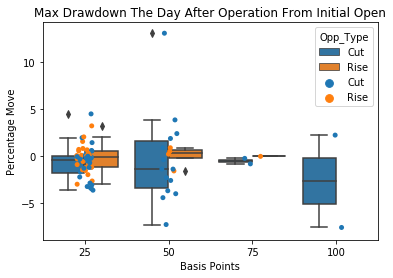

In [89]:
sns.stripplot(x='points', y='Drawdown_24hrs', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Drawdown_24hrs', hue='Opp_Type', data=fed)
axDD24 = plt.gca()
axDD24.set_xlabel('Basis Points')
axDD24.set_ylabel('Percentage Move')
axDD24.set_title('Max Drawdown The Day After Operation From Initial Open')





plt.savefig('DD24_plot.png', dpi=300)


fed.groupby(['points','Opp_Type'])['Drawdown_24hrs'].describe()

count      mean       std       min       25%       50%  \
points Opp_Type                                                            
25     Cut        28.0  1.145615  3.617058 -9.598374 -0.507899  1.201652   
       Rise       25.0  0.983960  3.381668 -4.734192 -1.133567  0.310478   
50     Cut        14.0  2.285361  6.524283 -7.444938 -2.029076  3.012901   
       Rise        4.0  0.346545  5.440852 -7.763220 -0.289232  2.767460   
75     Cut         2.0  6.132069  0.299540  5.920262  6.026165  6.132069   
       Rise        1.0 -1.581826       NaN -1.581826 -1.581826 -1.581826   
100    Cut         2.0 -2.024791  4.937450 -5.516095 -3.770443 -2.024791   

                      75%        max  
points Opp_Type                       
25     Cut       2.709924  10.437795  
       Rise      2.414300   9.897186  
50     Cut       6.992041  12.007663  
       Rise      3.403237   3.614479  
75     Cut       6.237972   6.343875  
       Rise     -1.581826  -1.581826  
100    Cut      -0.279138   1.466514

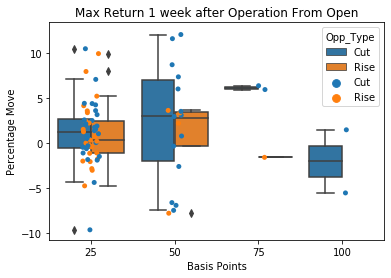

In [90]:
sns.stripplot(x='points', y='Max_return_1week', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Max_return_1week', hue='Opp_Type', data=fed)
axMR1w = plt.gca()
axMR1w.set_xlabel('Basis Points')
axMR1w.set_ylabel('Percentage Move')
axMR1w.set_title('Max Return 1 week after Operation From Open')

plt.savefig('MR1w_plot.png', dpi=300)
fed.groupby(['points','Opp_Type'])['Max_return_1week'].describe()

count      mean        std        min       25%       50%  \
points Opp_Type                                                              
25     Cut        28.0  1.783018   7.516332 -14.780396 -0.888963  1.988643   
       Rise       25.0  0.753758   7.269645 -17.312269 -2.755971  0.486478   
50     Cut        14.0  2.978099  11.641931 -21.419469 -0.690692  3.891778   
       Rise        4.0  4.574998   0.495836   3.951109  4.319561  4.623166   
75     Cut         2.0  4.666185   1.779214   3.408091  4.037138  4.666185   
       Rise        1.0 -6.259675        NaN  -6.259675 -6.259675 -6.259675   
100    Cut         2.0  6.507714   6.248032   2.089688  4.298701  6.507714   

                      75%        max  
points Opp_Type                       
25     Cut       4.719732  21.219645  
       Rise      4.664198  18.178478  
50     Cut       8.035972  27.407117  
       Rise      4.878604   5.102551  
75     Cut       5.295232   5.924279  
       Rise     -6.259675  -6.259675  
100    Cut       8.716727  10.925740

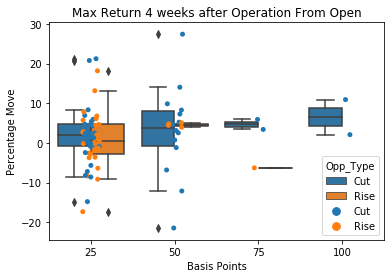

In [91]:
sns.stripplot(x='points', y='Max_return_4weeks', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Max_return_4weeks', hue='Opp_Type', data=fed)
axMR4w = plt.gca()
axMR4w.set_xlabel('Basis Points')
axMR4w.set_ylabel('Percentage Move')
axMR4w.set_title('Max Return 4 weeks after Operation From Open')

plt.savefig('MR4w_plot.png', dpi=300)
fed.groupby(['points','Opp_Type'])['Max_return_4weeks'].describe()

count       mean        std        min        25%        50%  \
points Opp_Type                                                                 
25     Cut        28.0  12.298246  23.448181 -35.799028  -1.629686   9.736544   
       Rise       25.0   9.950351  21.034816 -20.704343   0.148987   5.760405   
50     Cut        14.0  -1.448647  16.030684 -30.649449  -8.859796  -2.840432   
       Rise        4.0   7.154278  23.238141 -21.320094  -0.746868   7.188299   
75     Cut         2.0   0.158114   7.966132  -5.474792  -2.658339   0.158114   
       Rise        1.0  13.654994        NaN  13.654994  13.654994  13.654994   
100    Cut         2.0  35.981632  20.431286  21.534531  28.758082  35.981632   

                       75%        max  
points Opp_Type                        
25     Cut       27.380236  65.592166  
       Rise      12.463985  84.833863  
50     Cut        5.433536  25.424819  
       Rise      15.089445  35.560609  
75     Cut        2.974567   5.791020  
       Rise      13.654994  13.654994  
100    Cut       43.205183  50.428733

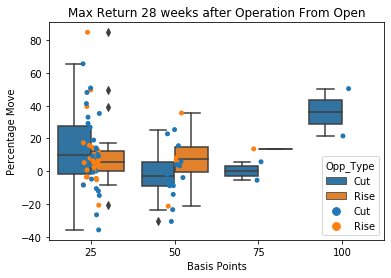

In [92]:
sns.stripplot(x='points', y='Max_return_28weeks', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Max_return_28weeks', hue='Opp_Type', data=fed)
axMR28w = plt.gca()
axMR28w.set_xlabel('Basis Points')
axMR28w.set_ylabel('Percentage Move')
axMR28w.set_title('Max Return 28 weeks after Operation From Open')

plt.savefig('MR28w_plot.png', dpi=300)
fed.groupby(['points','Opp_Type'])['Max_return_28weeks'].describe()

count       mean        std        min        25%        50%  \
points Opp_Type                                                                 
25     Cut        28.0  19.491444  33.515007 -41.135989   3.314383  21.056907   
       Rise       25.0   9.698179  21.897754 -56.985916   4.206685   8.336429   
50     Cut        14.0  -2.774239  27.181574 -33.159026 -19.401922 -13.407290   
       Rise        4.0  14.763748  38.760434 -42.166429   6.445380  30.580442   
75     Cut         2.0 -32.746965   1.784358 -34.008697 -33.377831 -32.746965   
       Rise        1.0  37.208127        NaN  37.208127  37.208127  37.208127   
100    Cut         2.0  63.696417  25.991940  45.317340  54.506878  63.696417   

                       75%        max  
points Opp_Type                        
25     Cut       30.635638  83.012703  
       Rise      16.198971  50.560458  
50     Cut       16.578157  51.714210  
       Rise      38.898811  40.060537  
75     Cut      -32.116099 -31.485233  
       Rise      37.208127  37.208127  
100    Cut       72.885955  82.075494

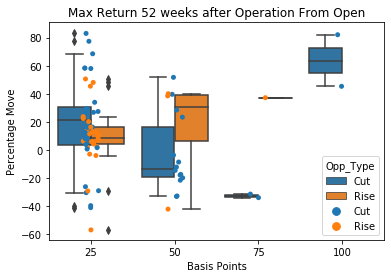

In [93]:
sns.stripplot(x='points', y='Max_return_52weeks', hue='Opp_Type', data=fed, jitter=True)
sns.boxplot(x='points', y='Max_return_52weeks', hue='Opp_Type', data=fed)
axMR52w = plt.gca()
axMR52w.set_xlabel('Basis Points')
axMR52w.set_ylabel('Percentage Move')
axMR52w.set_title('Max Return 52 weeks after Operation From Open')
plt.savefig('MR52w_plot.png', dpi=300)

fed.groupby(['points','Opp_Type'])['Max_return_52weeks'].describe()